In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import storage
import os

In [3]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/home/dell/gcloud_credentials/original-folio-296420-c6835ebfbfe7.json'

In [4]:
df =pd.read_parquet('gs://pacto-report-women/ieer_women/000000000000.parquet')

In [5]:
df['ieer_ponderado'] = df.iloc[:,1:].mean(axis=1)

In [6]:
df=df.sort_values('ano').set_index('ano')

In [7]:
df.columns= ['Não-Liderança','Gerência','Diretoria', 'Ponderado']

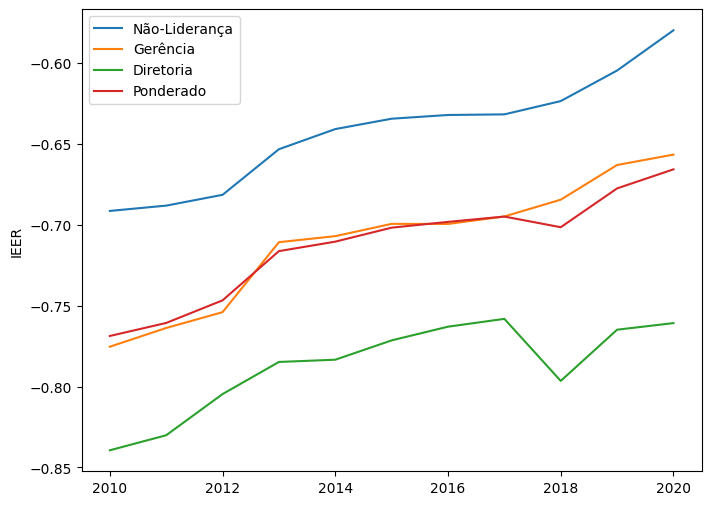

In [8]:
fig, ax = plt.subplots(figsize=(8,6))

cols = df.columns

for col in cols:
    ax.plot(df[col], label=col)

# ax.spines.right.set_visible(False)
# ax.spines.top.set_visible(False)
legend = ax.legend()
ax.set_xlabel('')
ax.set_ylabel('IEER')
fig.savefig("/tmp/ieer_evoution.pdf", bbox_inches='tight')
plt.show()

In [9]:
df = pd.read_parquet('gs://pacto-report-women/wage_gap/000000000000.parquet')

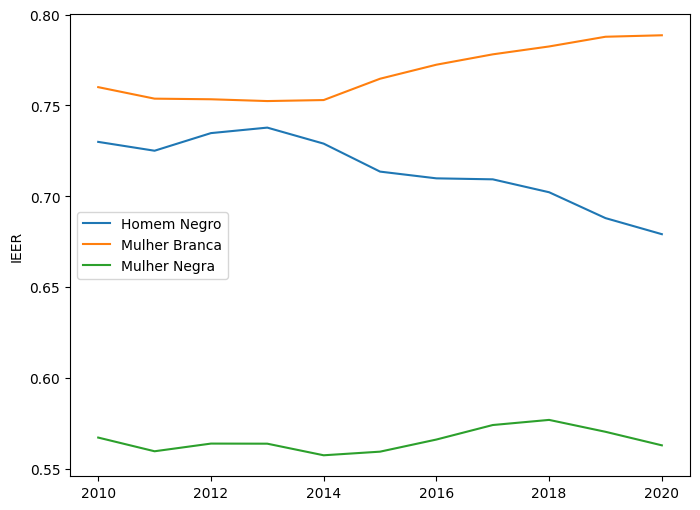

In [10]:
df=df.sort_values('ano').set_index('ano')
df = df.div(df['Homem_Branca'], axis=0)

df.drop(['Homem_Indigena', 'Mulher_Indigena'], axis=1, inplace=True)

df.columns = ['Homem Negro', 'Mulher Branca', 'Mulher Negra', 'Homem Branco']

fig, ax = plt.subplots(figsize=(8,6))

cols =df.iloc[:,:-1].columns

for col in cols:
    ax.plot(df[col], label=col)

# ax.spines.right.set_visible(False)
# ax.spines.top.set_visible(False)
legend = ax.legend()
ax.set_xlabel('')
ax.set_ylabel('IEER')
fig.savefig("/tmp/wagegap_evoution.pdf", bbox_inches='tight')
plt.show()

In [11]:
df=pd.read_parquet('gs://pacto-report-women/supply_gap/000000000000.parquet')

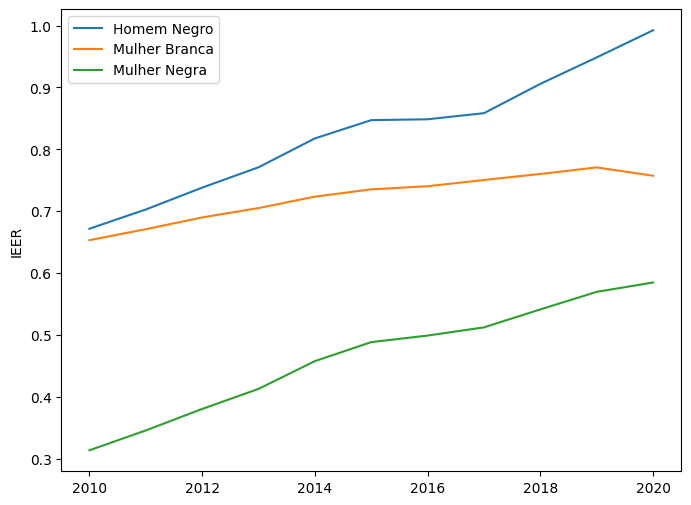

In [12]:
df=df.sort_values('ano').set_index('ano')

df = df.div(df['Homem_Branca'], axis=0)

df.drop(['Homem_Indigena', 'Mulher_Indigena'], axis=1, inplace=True)

df.columns = ['Homem Negro', 'Mulher Branca', 'Mulher Negra', 'Homem Branco']

fig, ax = plt.subplots(figsize=(8,6))

cols =df.iloc[:,:-1].columns

for col in cols:
    ax.plot(df[col], label=col)

# ax.spines.right.set_visible(False)
# ax.spines.top.set_visible(False)
legend = ax.legend()
ax.set_xlabel('')
ax.set_ylabel('IEER')
fig.savefig("/tmp/supplygap_evoution.pdf", bbox_inches='tight')
plt.show()